# Spam Detection using ML and NLP
#### We are building a ML model to detect spam message.The dataset has been sourced from https://archive.ics.uci.edu/ml/datasets/sms+spam+collection and includes labels for every message 

#### We will use this training data to train and test our models and use the appropriate one


In [1]:
#Loading required packages
import pandas as pd
import nltk
import re
import string
import sklearn
sw = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [2]:
#Creating a Dataframe using Pandas
df = pd.read_csv("C:/Data Science/NLTK/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv",header = None,sep="\t")

#Renaming Columns
df.columns = ['label','body_text']


In [3]:
#Increasing column width and exploring the dataset
pd.set_option('display.max_colwidth',100)
df.head(10)

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
5,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
6,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...
7,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...
8,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ..."


In [4]:
#We will writ a function to  remove punctuations and stopwords and lemmatize them
def clean_text(text):
    text = "".join([i.lower() for i in text if i not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(i) for i in tokens if i not in sw]
    return text
    


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfid = tfidf_vect.fit_transform(df['body_text'])

print(X_tfid.shape)
print(tfidf_vect.get_feature_names())


(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [6]:
X_tfid.toarray()

X_counts_df = pd.DataFrame(X_tfid.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [7]:
#Feature Creation - Building feature on raw and unclean text
#Creating text length as feature and disregards white spaces in it
df['text length'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df.head()


,label,body_text,text length
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [8]:
# Creating feature for % of text that is punctuation
def count_punct(text):
    count = sum([1 for i in text if i  in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

df['Punc%'] = df['body_text'].apply(lambda x:count_punct(x))
df.head()

,label,body_text,text length,Punc%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [9]:
#Evaluate Create Feature
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\vasee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


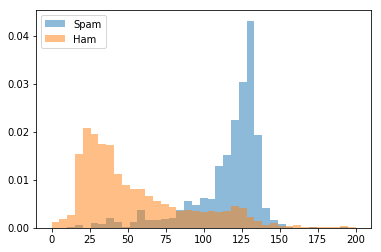

In [10]:
bins = np.linspace(0,200,40)

plt.hist(df[df['label']=='spam']['text length'],bins,alpha = 0.5,normed=True,label='Spam')
plt.hist(df[df['label']=='ham']['text length'],bins,alpha = 0.5,normed=True,label='Ham')
plt.legend(loc='upper left')
plt.show()

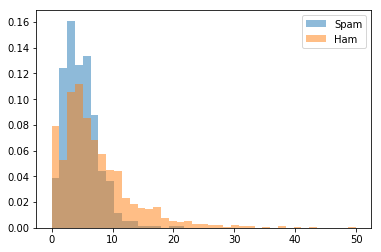

In [11]:
bins = np.linspace(0,50,40)

plt.hist(df[df['label']=='spam']['Punc%'],bins,alpha = 0.5,normed=True,label='Spam')
plt.hist(df[df['label']=='ham']['Punc%'],bins,alpha = 0.5,normed=True,label='Ham')
plt.legend(loc='upper right')
plt.show()

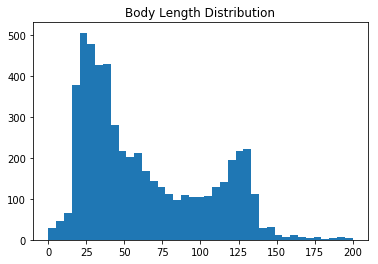

In [12]:
#Identifyng features for transformation
bins = np.linspace(0,200,40)
plt.hist(df['text length'],bins)
plt.title('Body Length Distribution')
plt.show()


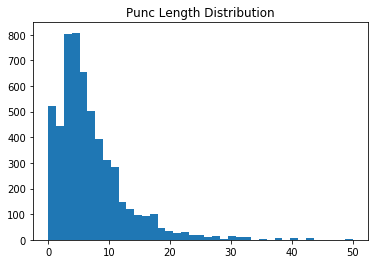

In [13]:
#Identifyng features for transformation
bins = np.linspace(0,50,40)
plt.hist(df['Punc%'],bins)
plt.title('Punc Length Distribution')
plt.show()

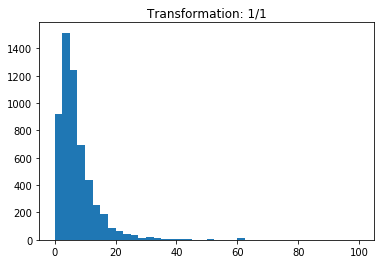

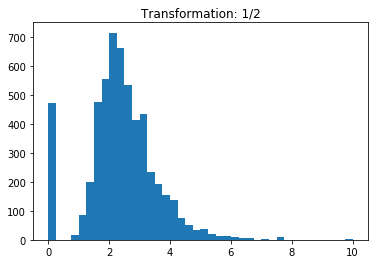

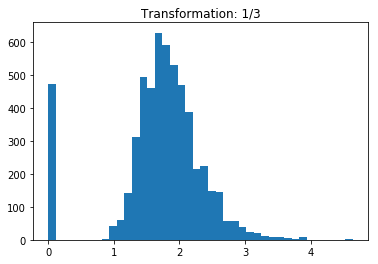

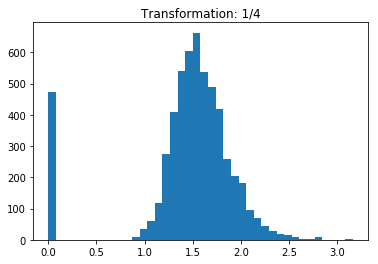

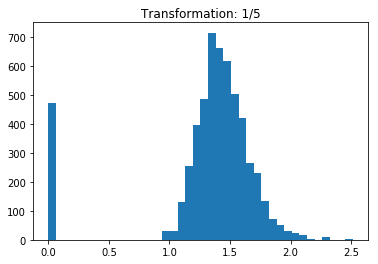

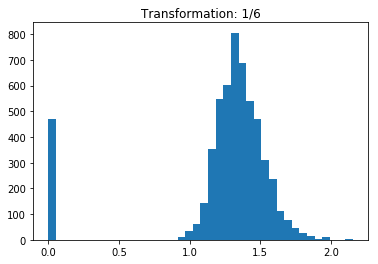

In [14]:
#Box Cox Transformation - We will check different types of tranformation and choose the best one
for i in [1,2,3,4,5,6]:
    plt.hist((df['Punc%'])**(1/i),bins=40)
    plt.title('Transformation: 1/{}'.format(str(i)))
    plt.show()


In [15]:
# Build Random Forest Model
#Cross Validation and evaluation and metrics Hold Out test set
X_features =  pd.concat([df['text length'],df['Punc%'],pd.DataFrame(X_tfid.toarray())], axis=1)
#X_features =  pd.concat([df['text length'], df['Punc%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()





,text length,Punc%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.ensemble import RandomForestClassifier
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_sp

C:\Users\vasee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
#Explore Randomforest classifer through Cross Validations
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf,X_features,df['label'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.97217235, 0.97486535, 0.97217235, 0.96316262, 0.96765499])

In [18]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_features,df['label'],test_size=0.2)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15,max_depth=20,n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [21]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.08473600065573568, 1804),
 (0.03303334985959539, 'text length'),
 (0.029067588736307343, 7030),
 (0.027565081132262928, 5727),
 (0.025283723155063678, 4799),
 (0.020128898616468997, 2172),
 (0.020034262769417364, 1882),
 (0.018704205829268686, 2032),
 (0.01634925264841277, 2300),
 (0.015624427369358122, 375)]

In [22]:
y_pred = rf_model.predict(X_test)
precision, recall,fscore,support = score(y_test,y_pred,pos_label='spam',average='binary')

In [23]:
print('Precision:{} / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                        round(recall,3),
                                                       round((y_pred==y_test).sum()/len(y_pred),3)))

Precision:1.0 / Recall: 0.572 / Accuracy: 0.942
